<a href="https://colab.research.google.com/github/Abhiramkalakota/Data-analytics-and-visualization/blob/main/DAVU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series & Geospatial
import folium
from folium.plugins import HeatMap
import plotly.express as px

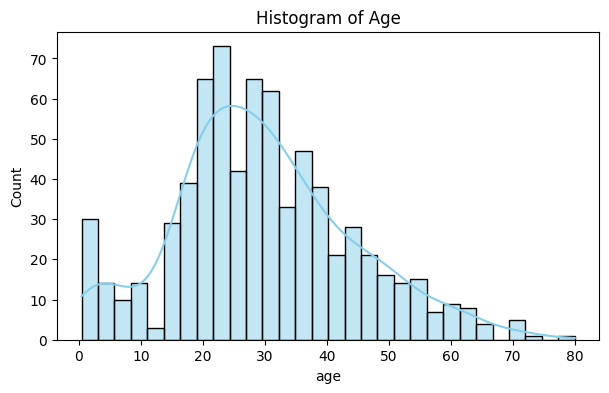

In [ ]:
# Example: Distribution of age
df = sns.load_dataset("titanic")
plt.figure(figsize=(7,4))
sns.histplot(df['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Histogram of Age")
plt.show()

In [ ]:
num_columns = df.shape[1]
print(f"The number of columns in the titanic dataset is: {num_columns}")


The number of columns in the titanic dataset is: 15


In [ ]:
print(df.columns.tolist())

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


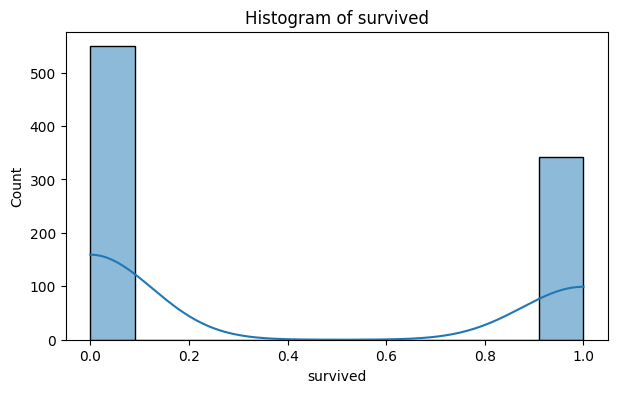

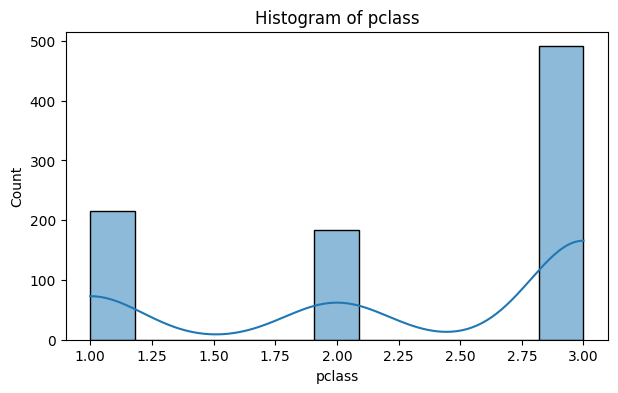

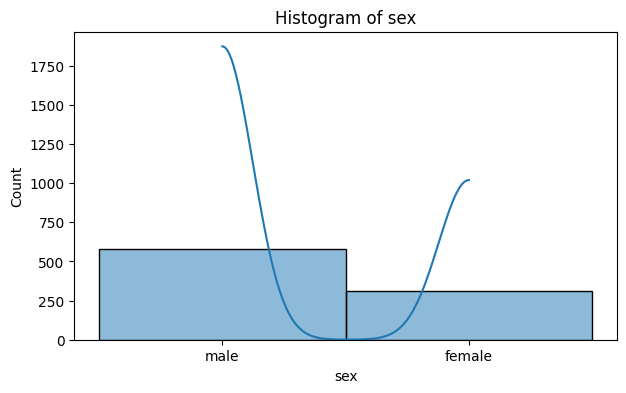

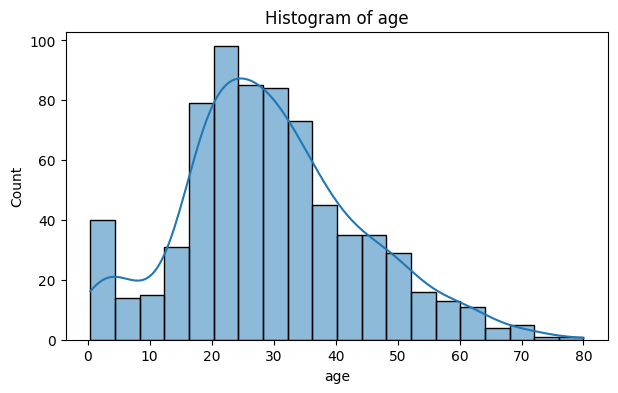

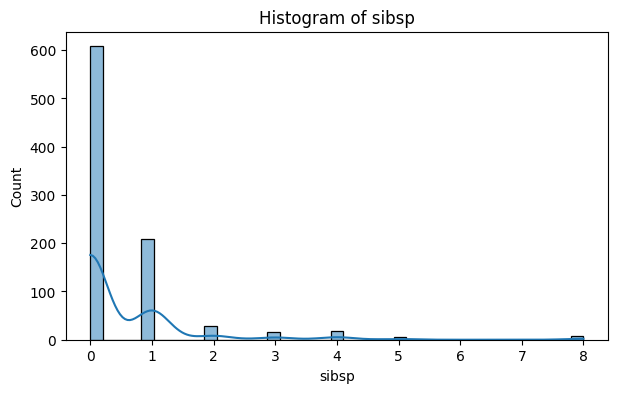

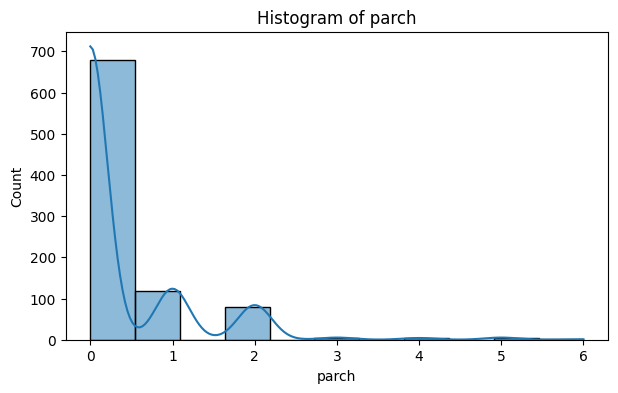

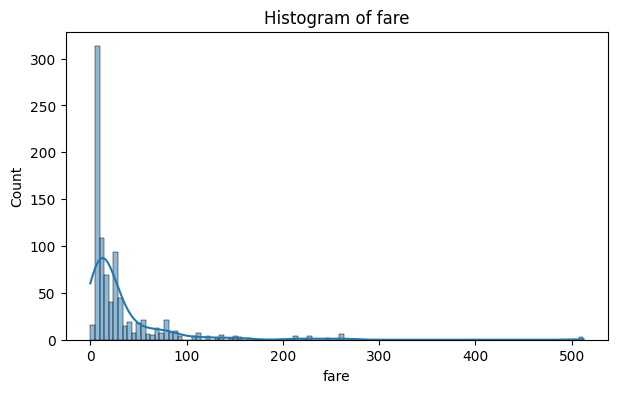

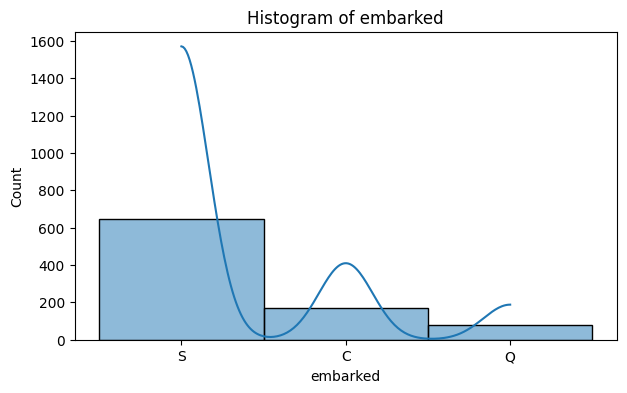

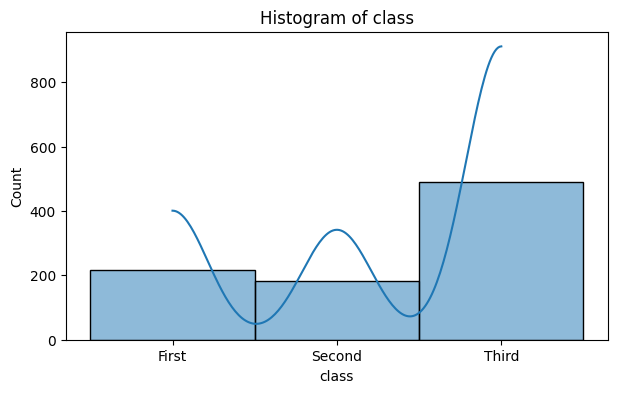

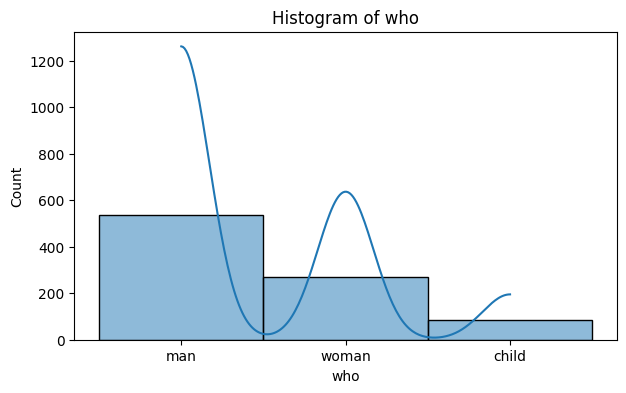

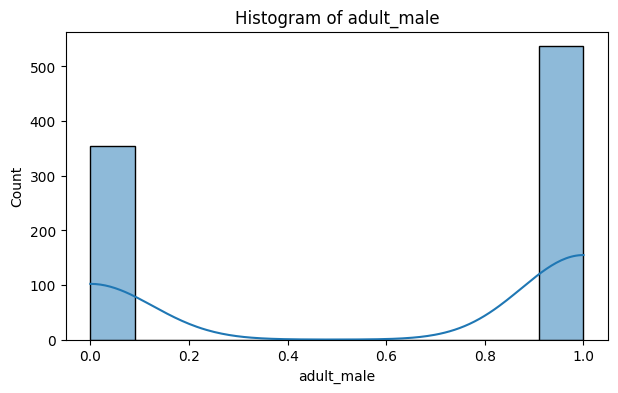

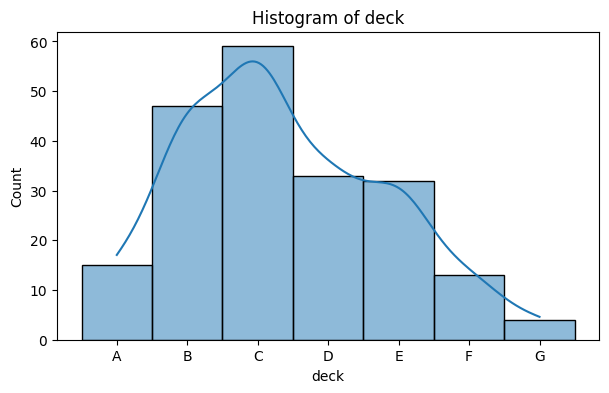

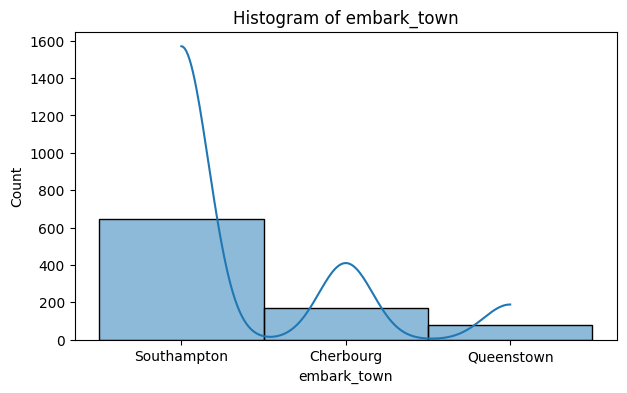

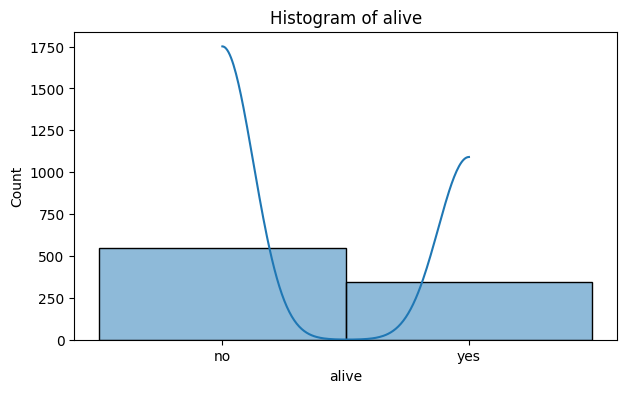

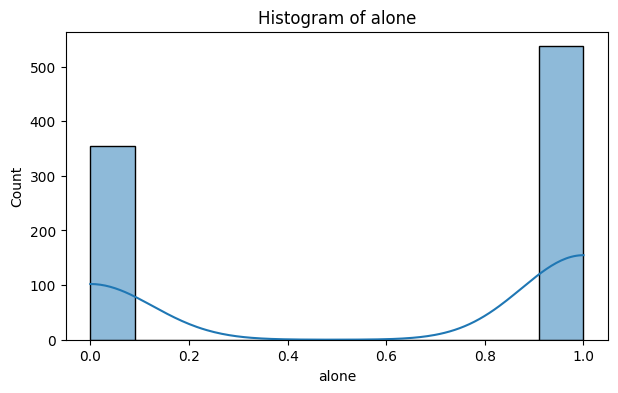

In [ ]:
for col in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

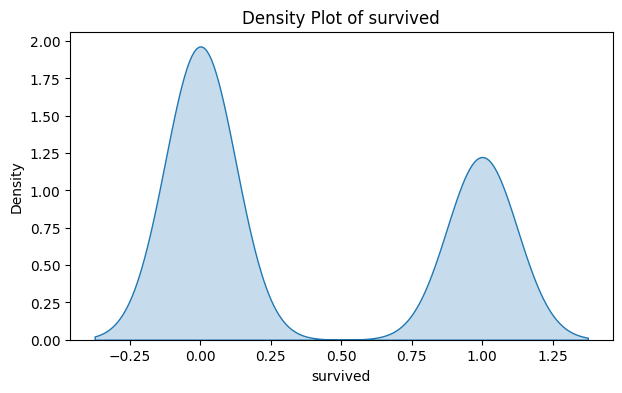

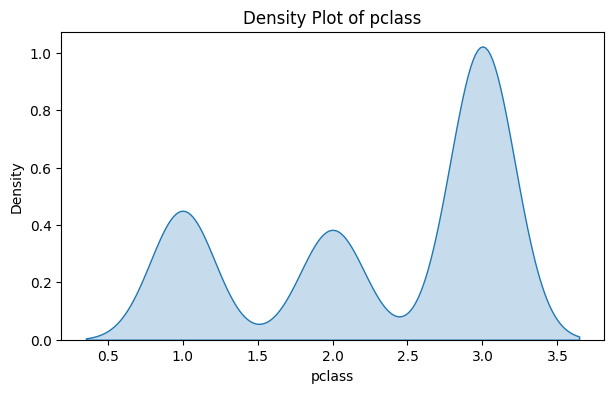

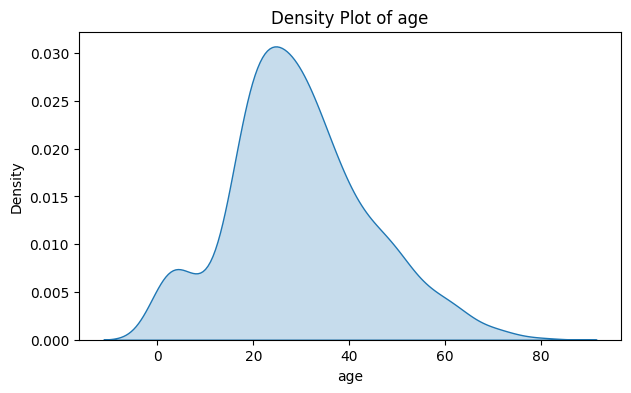

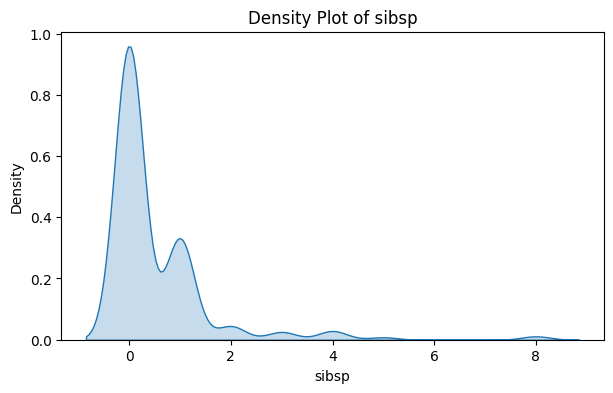

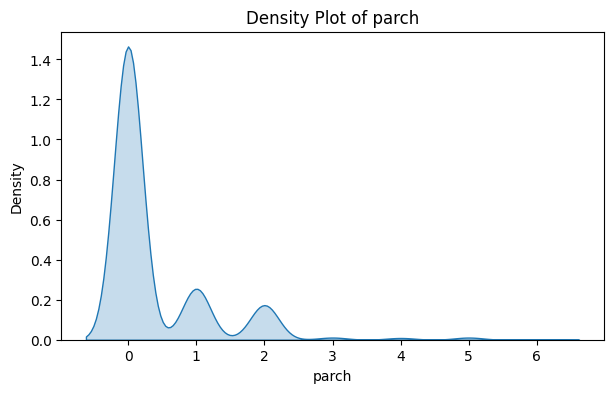

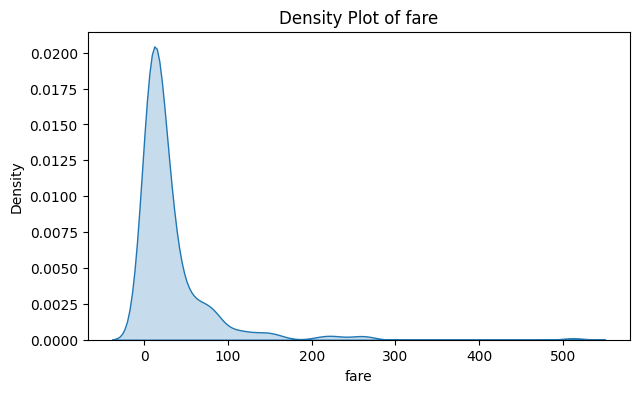

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64', 'datetime64[ns]']:
        plt.figure(figsize=(7, 4))
        sns.kdeplot(df[col].dropna(), fill=True)
        plt.title(f"Density Plot of {col}")
        plt.show()

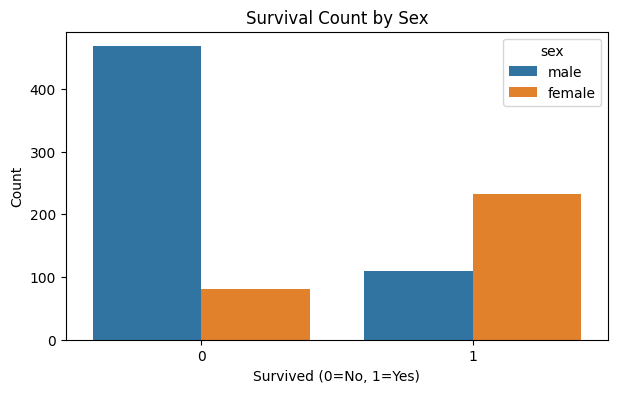

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='survived', hue='sex')
plt.title("Survival Count by Sex")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

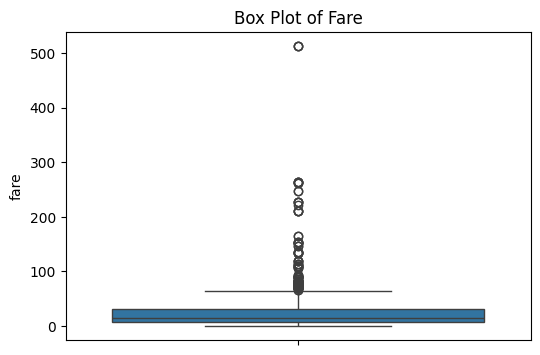

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['fare'])
plt.title("Box Plot of Fare")
plt.show()

/tmp/ipython-input-1448188243.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'].dropna(),shade=True, color='orange')


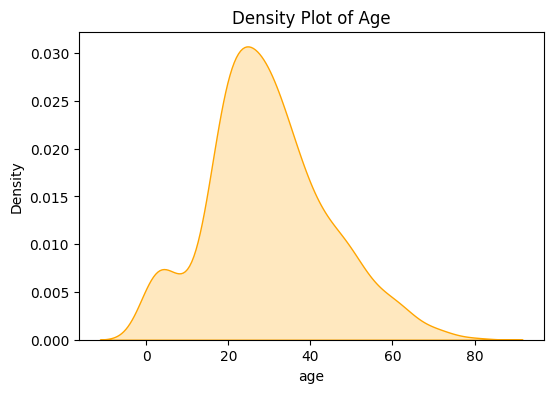

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['age'].dropna(),shade=True, color='orange')
plt.title("Density Plot of Age")
plt.show()

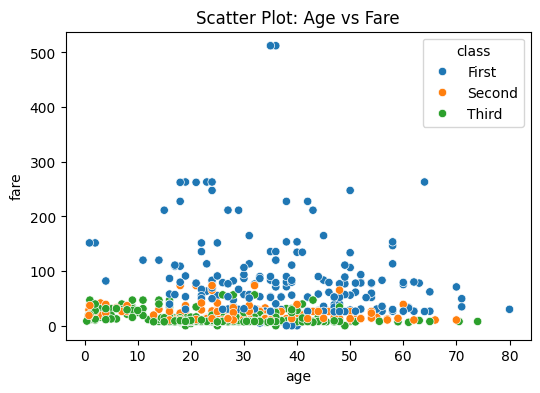

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='fare', hue='class', data=df)
plt.title("Scatter Plot: Age vs Fare")
plt.show()

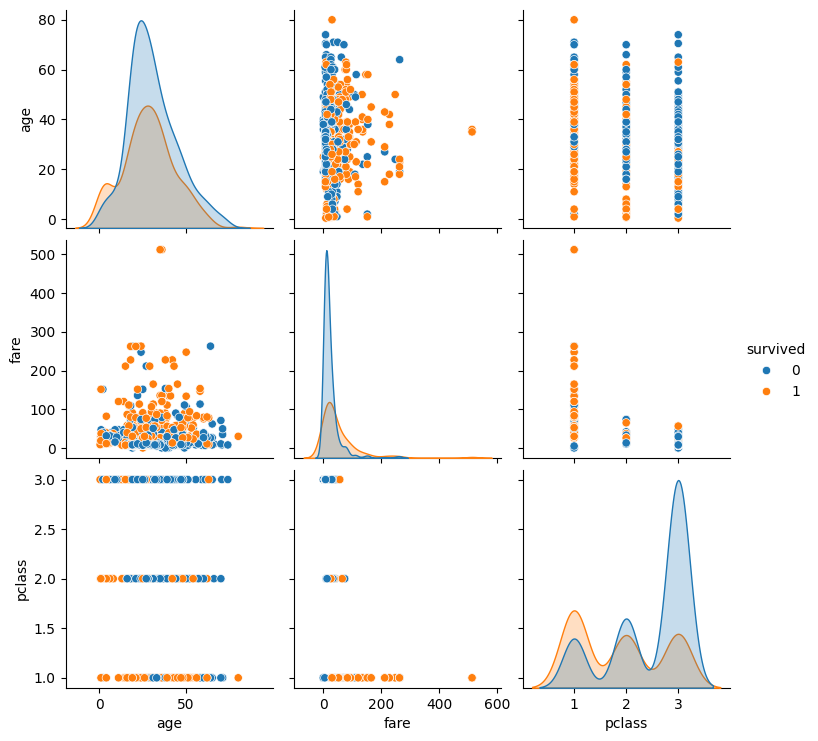

In [ ]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']].dropna(), hue='survived')
plt.show()

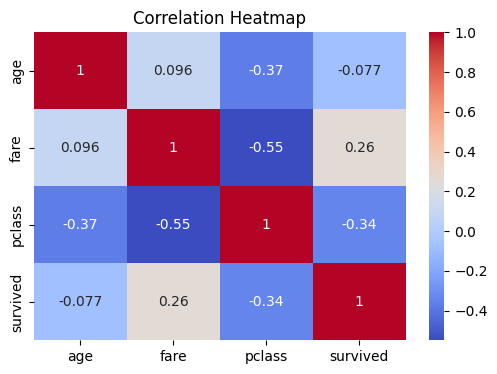

In [ ]:
corr = df[['age', 'fare', 'pclass', 'survived']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

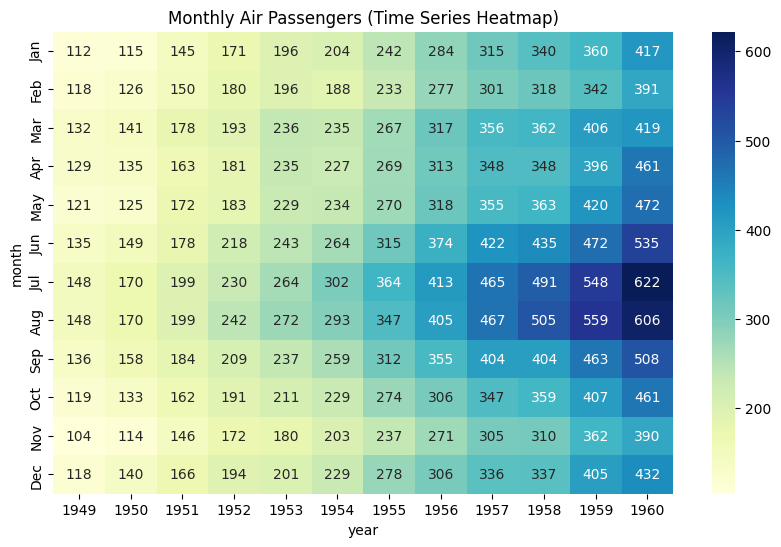

In [ ]:
ts = sns.load_dataset("flights")
ts = ts.pivot(index="month", columns="year", values="passengers")

plt.figure(figsize=(10,6))
sns.heatmap(ts, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Monthly Air Passengers (Time Series Heatmap)")
plt.show()

In [ ]:
# Create map centered at a specific location
m = folium.Map(location=[17.3850, 78.4867], zoom_start=6)  # Hyderabad
m

In [ ]:
folium.Marker([17.3850, 78.4867], popup="Hyderabad").add_to(m)
folium.Marker([12.9716, 77.5946], popup="Bengaluru").add_to(m)
m

In [ ]:
# Sample data (lat, lon)
data = [[17.3850, 78.4867], [12.9716, 77.5946], [13.0827, 80.2707]]
HeatMap(data).add_to(m)
m

In [ ]:
import plotly.express as px

data = px.data.tips()
fig = px.treemap(data, path=['day', 'time'], values='total_bill', color='day')
fig.show()

In [ ]:
fig = px.sunburst(data, path=['day', 'time', 'sex'], values='total_bill', color='time')
fig.show()

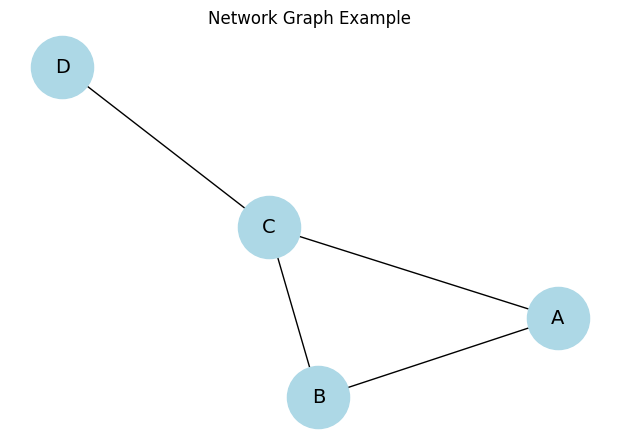

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([("A", "B"), ("B", "C"), ("A", "C"), ("C", "D")])

plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=14)
plt.title("Network Graph Example")
plt.show()

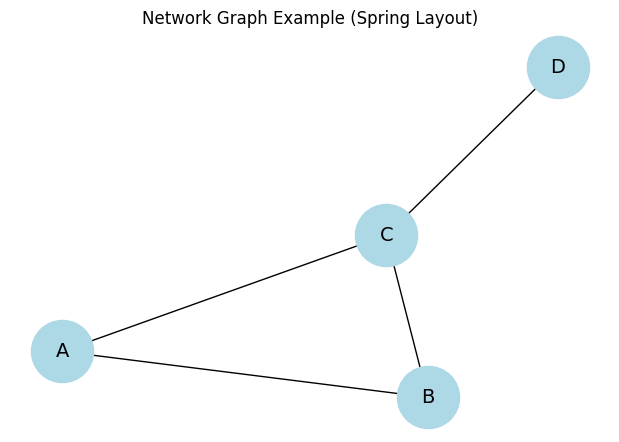

In [ ]:
# Example with a different layout (spring layout)
plt.figure(figsize=(6,4))
pos = nx.spring_layout(G) # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14)
plt.title("Network Graph Example (Spring Layout)")
plt.show()